### Q1. What is Gradient Boosting Regression?

Gradient Boosting Regression is a machine learning technique used for regression tasks, where the goal is to predict a continuous target variable. 

In [4]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
# generate dataset

np.random.seed(42)
X = np.linspace(0,10,100).reshape(-1,1)
y = 2*X.flatten()+1+np.random.normal(0,1,100)

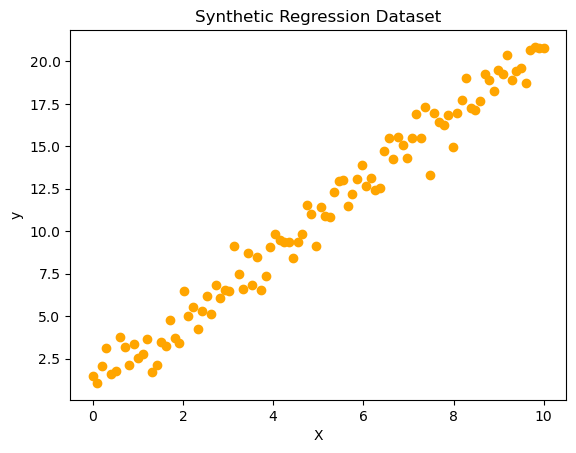

In [6]:
# Plot the dataset 

plt.scatter(X,y,color='orange')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Regression Dataset")
plt.show()

In [7]:
# Split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [8]:
#train the Model

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [9]:
#prediction

y_test_pred = gbr.predict(X_test)

In [10]:
test_mse = mean_squared_error(y_test,y_test_pred)
test_r2 = r2_score (y_test,y_test_pred)
print("mean_squared_error : ",test_mse )
print(f'r2_score : {test_r2}')

mean_squared_error :  0.8389042716884119
r2_score : 0.9754500750944282


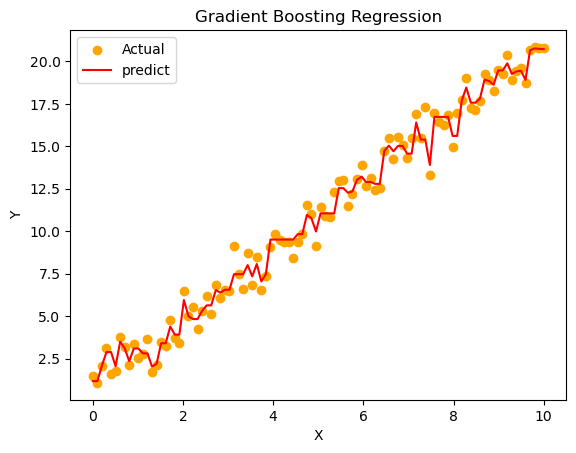

In [11]:
# plot the result

plt.scatter(X,y,color='orange',label="Actual")
plt.plot(X,gbr.predict(X),color='red',label="predict")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()

### Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to optimise the performance of the model. Use grid search or random search to find the best hyperparameters

In [12]:
# Defien the parameter grid

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [1, 3],
}

In [13]:
#grid search

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=gbr , param_grid=param_grid ,cv=5,scoring='neg_mean_squared_error',n_jobs=1,verbose=0)


In [14]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [1, 3],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [17]:
# Get the best parameters and the best model

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [18]:
print(f"Best parameters found: {best_params}")

Best parameters found: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


In [19]:
#predict 
y_test_pred = best_model.predict(X_test)

In [20]:
#evaluate the model

test_mse = mean_squared_error(y_test,y_test_pred)
test_r2 = r2_score (y_test,y_test_pred)

print(f'Testing Mean Squared Error: {test_mse}')
print(f'Testing R-squared: {test_r2}')


Testing Mean Squared Error: 0.7499322135192841
Testing R-squared: 0.9780537778296046


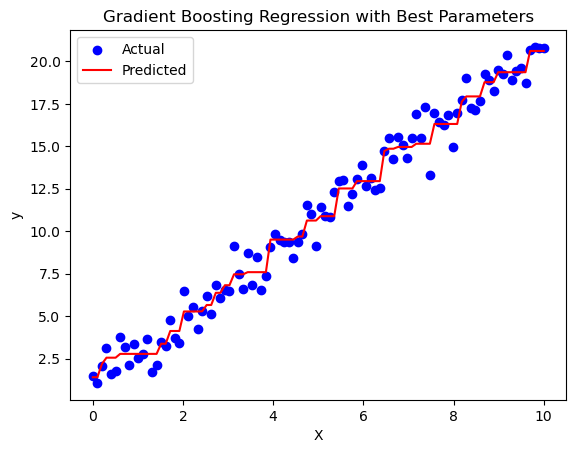

In [21]:
# Plot the results
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, best_model.predict(X), color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression with Best Parameters')
plt.legend()
plt.show()

### Q4. What is a weak learner in Gradient Boosting?

In Gradient Boosting, a weak learner (or base learner) is a simple model that performs only slightly better than random guessing. The idea behind using weak learners is that, while each individual model may not be very powerful on its own, combining many of them in a sequential manner can produce a strong, accurate model.

### Q5. What is the intuition behind the Gradient Boosting algorithm?

The intuition behind the Gradient Boosting algorithm revolves around improving the model incrementally by correcting the errors made by the previous models in a sequence. 

### Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

Gradient Boosting builds an ensemble of weak learners by adding them sequentially, with each new learner attempting to correct the errors made by the ensemble of learners up to that point. 

In [22]:
### Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting algorithm?

 Mathematical Intuition :
- Initialization: Start with an initial model 
- Pseudo-Residuals: Compute the pseudo-residuals for the current model by taking the negative gradient of the loss function with respect to the model's predictions.
- Weak Learner: Train a weak learner on these pseudo-residuals to capture the structure of the errors.
- Model Update: Update the current model by adding the predictions of the weak learner, scaled by a learning rate.
- Iteration: Repeat the process for a fixed number of iterations or until convergence.